In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 

In [3]:
train_df = pd.read_csv("dataset/train.csv")

In [4]:
test_df = pd.read_csv("dataset/test.csv")

In [5]:
test_df.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [6]:
train_df.sample(10)

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
3997,csid_3998,27.444389,5.247284,0.133512,0.095811,0.386558,5.981924,2.764763,4.792546,B,F,0
5282,csid_5283,16.232686,5.916077,-0.020526,-0.076586,0.238959,4.271057,4.165366,47.857237,C,AA,0
6430,csid_6431,13.228454,8.955753,-0.252092,0.015062,16.419301,8.759453,1.115353,0.088685,B,F,0
656,csid_657,13.511438,5.774427,0.017794,-0.001099,0.069553,3.277483,5.789041,74.495771,C,AA,0
3201,csid_3202,17.822978,4.058163,0.069644,0.120725,0.232410,4.330327,3.664458,15.883675,C,A,0
7786,csid_7787,20.234898,5.021168,0.041713,0.033708,0.207317,3.117887,3.606359,40.946013,C,AA,0
1581,csid_1582,16.717844,6.083793,0.109794,-0.039616,1.469507,4.933431,2.494255,5.118984,C,F,0
2704,csid_2705,28.008214,7.751893,0.108758,0.009520,0.565899,5.297990,2.956450,8.547025,C,F,0
233,csid_234,17.313397,7.535643,0.026485,-0.064366,0.262065,5.673980,3.532877,8.717925,C,F,0
633,csid_634,15.007623,7.513203,0.034893,-0.057241,0.155379,4.109156,5.307754,34.546342,C,AA,0


In [7]:
train_df.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
count,10738.000000,10696.000000,10738.000000,10701.000000,10738.000000,10692.000000,10672.000000,10738.000000,10738.000000
mean,19.060941,5.274847,0.175912,0.374230,2.376895,5.788180,3.150071,17.061836,0.120600
std,7.419609,1.882559,0.372829,1.222031,5.601911,2.531309,1.035416,18.762693,0.325677
min,0.568965,-0.161940,-0.547989,-0.462494,0.028575,2.752836,0.363338,-0.486834,0.000000
25%,13.518021,3.971587,0.010840,-0.027666,0.313610,4.193234,2.454017,4.530085,0.000000
50%,18.774109,5.218479,0.074078,0.037201,0.516830,4.842575,3.118394,12.653357,0.000000
75%,24.501719,6.520364,0.159606,0.179029,1.125380,6.286400,3.756566,23.114577,0.000000
max,47.306691,16.638243,2.679474,14.701914,52.395014,18.743836,9.090206,248.552755,1.000000


In [8]:
train_df.isna().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64

In [9]:
train_df['customer_category'].unique()

array([0, 1], dtype=int64)

In [12]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "AA": 5}
cav_map = train_df['customer_active_segment'].unique()
#df['Deck'] = df['Deck'].map(deck)

In [10]:
train_df['X1'].unique()

array(['F', 'A', 'BA', 'AA', 'E', nan], dtype=object)

In [11]:
def impute_categoriel_nullvalues_with_most_common(df):
    df['customer_active_segment'].fillna(df['customer_active_segment'].mode().iloc[0],inplace=True)
    df['X1'].fillna(df['X1'].mode().iloc[0],inplace=True)
    return df

In [12]:
train_df = impute_categoriel_nullvalues_with_most_common(train_df)
test_df = impute_categoriel_nullvalues_with_most_common(test_df)

In [13]:
train_df[train_df['customer_category']==0]

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10733,csid_10734,23.672615,6.701514,0.092879,-0.017332,1.210397,7.003663,3.027084,1.952911,C,BA,0
10734,csid_10735,25.673028,6.497796,0.050216,-0.047211,0.725230,5.407507,3.104172,5.124286,C,BA,0
10735,csid_10736,31.676844,7.799880,0.062961,-0.032765,0.318118,5.598486,2.403051,21.864188,A,BA,0
10736,csid_10737,28.441780,5.588302,-0.093931,0.081586,0.132177,3.616492,4.972243,86.969977,B,AA,0


In [14]:
train_df[train_df['customer_category']==1]

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
19,csid_20,12.297850,4.128526,0.472005,0.725384,5.581855,7.996984,2.064806,0.942554,B,F,1
42,csid_43,19.812574,5.788460,0.081404,0.084755,0.164644,4.265691,4.355578,26.697315,C,BA,1
61,csid_62,7.073645,2.222898,1.868179,6.076476,13.972696,7.978077,2.253698,0.136040,C,BA,1
92,csid_93,5.074714,3.232825,1.935050,6.089135,12.965956,9.922563,1.947647,-0.184121,C,F,1
93,csid_94,16.208038,4.866526,0.349939,0.895663,0.741226,7.242972,2.396141,3.793962,C,F,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10654,csid_10655,19.622586,5.156124,0.555816,0.866730,0.777841,5.238711,3.488082,15.804106,B,BA,1
10673,csid_10674,3.840788,7.425404,1.248447,3.201652,19.804119,8.917952,1.058483,-0.079199,C,BA,1
10691,csid_10692,3.864101,4.698792,1.020713,2.161326,0.192018,3.812373,3.427225,48.124003,D,AA,1
10698,csid_10699,17.498318,7.168869,0.421270,0.471320,9.096204,10.213519,1.805510,-0.187379,C,F,1


In [15]:
train_df.corr()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
customer_visit_score,1.000000,0.274672,-0.569430,-0.474176,-0.209270,-0.220016,0.170497,0.118925,-0.449654
customer_product_search_score,0.274672,1.000000,-0.415910,-0.414855,-0.023031,-0.066274,0.051181,0.044181,-0.300862
customer_ctr_score,-0.569430,-0.415910,1.000000,0.909248,0.419461,0.448071,-0.342506,-0.232876,0.794445
customer_stay_score,-0.474176,-0.414855,0.909248,1.000000,0.400374,0.406516,-0.311451,-0.210629,0.679366
customer_frequency_score,-0.209270,-0.023031,0.419461,0.400374,1.000000,0.702688,-0.533142,-0.326201,0.389465
customer_product_variation_score,-0.220016,-0.066274,0.448071,0.406516,0.702688,1.000000,-0.694476,-0.525783,0.493958
customer_order_score,0.170497,0.051181,-0.342506,-0.311451,-0.533142,-0.694476,1.000000,0.763861,-0.385278
customer_affinity_score,0.118925,0.044181,-0.232876,-0.210629,-0.326201,-0.525783,0.763861,1.000000,-0.274105
customer_category,-0.449654,-0.300862,0.794445,0.679366,0.389465,0.493958,-0.385278,-0.274105,1.000000


In [ ]:
Male Female Other 1 2 3
100
010
001

In [16]:
def oneHot(df):
    encode_df = pd.DataFrame(df, columns=["customer_active_segment","X1"])
    dumm_df = pd.get_dummies(encode_df, columns=["customer_active_segment","X1"], prefix=["CustomerSegment","Loyality"] )
    df = df.join(dumm_df)
    dumm_df = pd.get_dummies(encode_df, columns=["customer_active_segment","X1"], prefix=["CustomerSegment","Loyality"] )
    df.drop(columns=['customer_active_segment','X1'],inplace=True)
    return df

In [17]:
train_df = oneHot(train_df)
test_df = oneHot(test_df)

In [77]:
def cat_to_numeric(data):
    data["customer_active_segment"] = data["customer_active_segment"].astype('category')
    data["X1"] = data["X1"].astype('category')
    data["customer_active_segment"] = data["customer_active_segment"].cat.codes
    data["X1"] = data["X1"].cat.codes
    return data

In [78]:
train_df = cat_to_numeric(train_df)
test_df = cat_to_numeric(test_df)

In [79]:
train_df[train_df['customer_active_segment']==-1]

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
786,csid_787,22.558985,3.698032,0.088970,0.134925,0.203078,4.370322,2.984302,34.930526,-1,1,0
1204,csid_1205,28.983164,3.714139,-0.052482,0.269622,0.309216,4.249715,3.747923,36.015689,-1,1,0
1774,csid_1775,7.242760,3.354086,0.266073,0.563699,0.319198,4.941706,3.536417,14.021335,-1,2,0
1971,csid_1972,25.727630,7.748307,-0.001675,-0.090084,0.427364,5.621277,2.880804,19.798800,-1,0,0
1982,csid_1983,18.463432,4.343687,0.178411,0.014157,0.733002,4.576995,2.909578,8.186632,-1,2,0
2110,csid_2111,16.189300,3.413473,0.133424,0.061990,0.240074,4.738037,2.823730,22.646276,-1,0,0
3031,csid_3032,27.444705,6.965722,-0.025883,-0.025970,1.046338,5.468566,2.668303,2.726708,-1,4,0
3492,csid_3493,17.260650,5.125916,0.091369,0.145551,0.318524,3.172130,4.607539,34.752637,-1,1,0
3612,csid_3613,20.818556,5.227684,0.003406,0.000714,0.315317,5.011255,3.116561,11.315526,-1,2,0
3616,csid_3617,19.380305,5.341641,0.070395,0.113743,0.380836,4.247361,4.501720,23.811081,-1,0,0


In [18]:
mask = np.zeros_like(train_df.corr())
tarinagle_indices = np.triu_indices_from(mask)
mask[tarinagle_indices]=True

<function matplotlib.pyplot.show(close=None, block=None)>

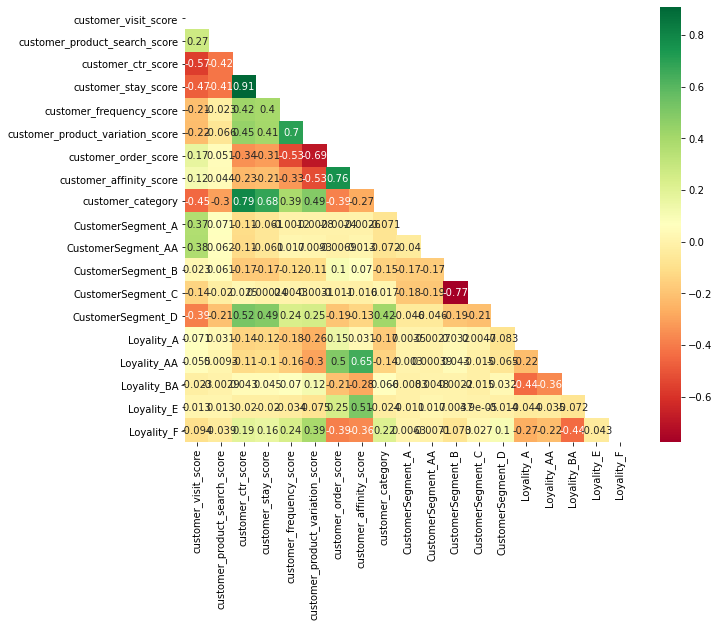

In [19]:
sns.heatmap(train_df.corr(),mask= mask,annot=True,cmap='RdYlGn') 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show

In [20]:
train_df = train_df.iloc[:,1:]
cust_id = test_df['customer_id']
test_df = test_df.iloc[:,1:]

In [21]:
train_df.isna().sum()

customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_category                    0
CustomerSegment_A                    0
CustomerSegment_AA                   0
CustomerSegment_B                    0
CustomerSegment_C                    0
CustomerSegment_D                    0
Loyality_A                           0
Loyality_AA                          0
Loyality_BA                          0
Loyality_E                           0
Loyality_F                           0
dtype: int64

In [22]:
train_df[['customer_stay_score','customer_ctr_score']]

,customer_stay_score,customer_ctr_score
0,-0.139541,-0.070203
1,-0.102726,0.153298
2,0.262834,0.106709
3,-0.100526,-0.020226
4,0.172891,0.187178
...,...,...
10733,-0.017332,0.092879
10734,-0.047211,0.050216
10735,-0.032765,0.062961
10736,0.081586,-0.093931


In [25]:
def imputer(data):
    imp_mean = IterativeImputer(estimator=ExtraTreesRegressor(), random_state=0,verbose=2)
    imp_mean.fit(data)
    return pd.DataFrame(imp_mean.transform(data))

In [26]:
train_df_nonull=imputer(train_df)
train_df_nonull.columns=train_df.columns

[IterativeImputer] Completing matrix with shape (10738, 19)
[IterativeImputer] Ending imputation round 1/10, elapsed time 32.57
[IterativeImputer] Change: 6.558056015064831, scaled tolerance: 0.24855275470161067 
[IterativeImputer] Ending imputation round 2/10, elapsed time 66.17
[IterativeImputer] Change: 1.0080610791636815, scaled tolerance: 0.24855275470161067 
[IterativeImputer] Ending imputation round 3/10, elapsed time 98.83
[IterativeImputer] Change: 0.49193092825615814, scaled tolerance: 0.24855275470161067 
[IterativeImputer] Ending imputation round 4/10, elapsed time 131.98
[IterativeImputer] Change: 0.5100701926899773, scaled tolerance: 0.24855275470161067 
[IterativeImputer] Ending imputation round 5/10, elapsed time 165.34
[IterativeImputer] Change: 0.7470407912802592, scaled tolerance: 0.24855275470161067 
[IterativeImputer] Ending imputation round 6/10, elapsed time 199.89
[IterativeImputer] Change: 0.5756017791025325, scaled tolerance: 0.24855275470161067 
[IterativeImp

C:\Users\91830\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


[IterativeImputer] Completing matrix with shape (10738, 19)
[IterativeImputer] Ending imputation round 1/10, elapsed time 4.72
[IterativeImputer] Ending imputation round 2/10, elapsed time 7.97
[IterativeImputer] Ending imputation round 3/10, elapsed time 11.61
[IterativeImputer] Ending imputation round 4/10, elapsed time 16.81
[IterativeImputer] Ending imputation round 5/10, elapsed time 21.93
[IterativeImputer] Ending imputation round 6/10, elapsed time 24.61
[IterativeImputer] Ending imputation round 7/10, elapsed time 28.01
[IterativeImputer] Ending imputation round 8/10, elapsed time 33.85
[IterativeImputer] Ending imputation round 9/10, elapsed time 33.90
[IterativeImputer] Ending imputation round 10/10, elapsed time 33.95


In [27]:
train_df_nonull.columns

Index(['customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score', 'customer_category', 'CustomerSegment_A',
       'CustomerSegment_AA', 'CustomerSegment_B', 'CustomerSegment_C',
       'CustomerSegment_D', 'Loyality_A', 'Loyality_AA', 'Loyality_BA',
       'Loyality_E', 'Loyality_F'],
      dtype='object')

In [28]:
test_df_nonull=imputer(test_df)
test_df_nonull.columns=test_df.columns

[IterativeImputer] Completing matrix with shape (7160, 18)
[IterativeImputer] Ending imputation round 1/10, elapsed time 21.60
[IterativeImputer] Change: 7.867938961524534, scaled tolerance: 0.2572518101199387 
[IterativeImputer] Ending imputation round 2/10, elapsed time 42.38
[IterativeImputer] Change: 0.5033550601609349, scaled tolerance: 0.2572518101199387 
[IterativeImputer] Ending imputation round 3/10, elapsed time 63.01
[IterativeImputer] Change: 0.6224291228192689, scaled tolerance: 0.2572518101199387 
[IterativeImputer] Ending imputation round 4/10, elapsed time 83.87
[IterativeImputer] Change: 0.6634028207823839, scaled tolerance: 0.2572518101199387 
[IterativeImputer] Ending imputation round 5/10, elapsed time 104.80
[IterativeImputer] Change: 0.605127715746157, scaled tolerance: 0.2572518101199387 
[IterativeImputer] Ending imputation round 6/10, elapsed time 126.27
[IterativeImputer] Change: 0.49786020012385457, scaled tolerance: 0.2572518101199387 
[IterativeImputer] End

C:\Users\91830\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


[IterativeImputer] Completing matrix with shape (7160, 18)
[IterativeImputer] Ending imputation round 1/10, elapsed time 1.47
[IterativeImputer] Ending imputation round 2/10, elapsed time 3.35
[IterativeImputer] Ending imputation round 3/10, elapsed time 4.95
[IterativeImputer] Ending imputation round 4/10, elapsed time 6.37
[IterativeImputer] Ending imputation round 5/10, elapsed time 7.21
[IterativeImputer] Ending imputation round 6/10, elapsed time 7.25
[IterativeImputer] Ending imputation round 7/10, elapsed time 7.29
[IterativeImputer] Ending imputation round 8/10, elapsed time 7.34
[IterativeImputer] Ending imputation round 9/10, elapsed time 7.38
[IterativeImputer] Ending imputation round 10/10, elapsed time 7.42


In [29]:
test_df_nonull.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,CustomerSegment_A,CustomerSegment_AA,CustomerSegment_B,CustomerSegment_C,CustomerSegment_D,Loyality_A,Loyality_AA,Loyality_BA,Loyality_E,Loyality_F
0,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
train_df_nonull.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category,CustomerSegment_A,CustomerSegment_AA,CustomerSegment_B,CustomerSegment_C,CustomerSegment_D,Loyality_A,Loyality_AA,Loyality_BA,Loyality_E,Loyality_F
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
train_df_nonull.isna().sum()

customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_category                   0
CustomerSegment_A                   0
CustomerSegment_AA                  0
CustomerSegment_B                   0
CustomerSegment_C                   0
CustomerSegment_D                   0
Loyality_A                          0
Loyality_AA                         0
Loyality_BA                         0
Loyality_E                          0
Loyality_F                          0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

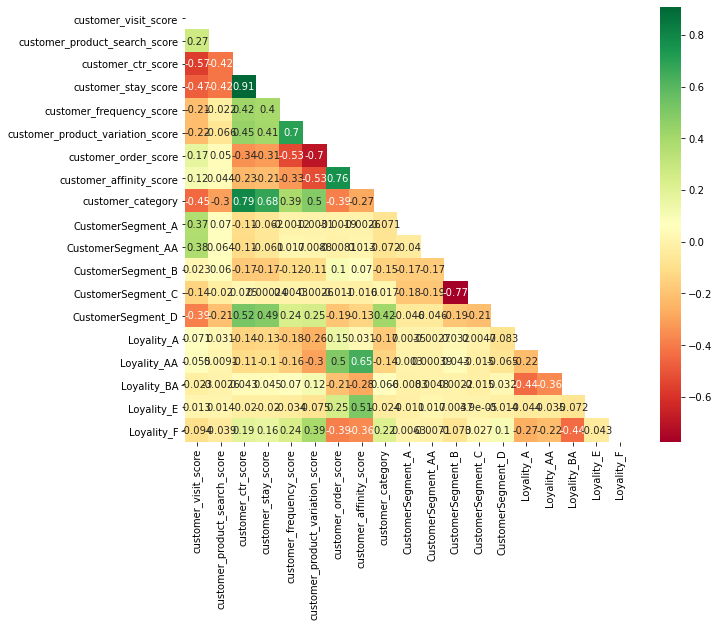

In [32]:
sns.heatmap(train_df_nonull.corr(),mask= mask,annot=True,cmap='RdYlGn') 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show

In [80]:
test_df.isna().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       29
customer_ctr_score                   0
customer_stay_score                 16
customer_frequency_score             0
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score              0
customer_active_segment              0
X1                                   0
dtype: int64

In [57]:
y = train_df["customer_category"]
X = train_df_nonull.iloc[:,:-1]
X_test = test_df_nonull

In [ ]:
10  --> mean, std
min max scaler
min  max

x[i] - mea
---
mean-std

In [58]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))

In [51]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10733    0
10734    0
10735    0
10736    0
10737    0
Name: customer_category, Length: 10738, dtype: int64

In [ ]:
Train 95
devtest 2.5
test 2.5
test_tets_split(0.25)


10/2 =5

5-10 , 1-2 train 3-4 dev test


In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [53]:
# 79.95 accuracy
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf,X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [64]:
# 91.56 accuracy
clf = RandomForestClassifier(n_estimators=100)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [34]:
# 77.30 accuracy
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [37]:
clf = KNeighborsClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.97486034 0.95903166 0.96368715 0.95810056 0.95903166 0.96834264
 0.96368715 0.96182495 0.96551724 0.95526561]


In [60]:
# 94.65 accuracy
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=10, scoring=scoring)
print(score)

[1.         0.9990689  1.         0.9981378  0.9990689  1.
 1.         1.         1.         0.99906803]


In [ ]:
# 94.65 accuracy
clf = LinearSVC()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [61]:
round(np.mean(score)*100, 2)

99.95

In [62]:
clf.fit(X,y)
predictions = clf.predict(X_test)

In [63]:
predictions.shape

(7160,)

In [64]:
output = pd.DataFrame({'customer_id': cust_id, 'customer_category': predictions})
output.to_csv('dataset/my_submission_svc_oneHOT_normalization.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
